<a href="https://colab.research.google.com/github/SachinScaler/Apr24_TimeSeries_and_RecSys/blob/main/TIme_Series_Analysis_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 16TAoRZ3S8ebgIq3dPQmWIXPw_1dZy3ta

Downloading...
From: https://drive.google.com/uc?id=16TAoRZ3S8ebgIq3dPQmWIXPw_1dZy3ta
To: /content/rest_vis.csv
100% 13.1k/13.1k [00:00<00:00, 23.3MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### set default figsize
plt.rcParams['figure.figsize'] = (14,6)

df1 = pd.read_csv('/content/rest_vis.csv')
df1.head()

,date,weekday,holiday,total
0,1/1/2016,Friday,1,296.0
1,1/2/2016,Saturday,0,191.0
2,1/3/2016,Sunday,0,202.0
3,1/4/2016,Monday,0,105.0
4,1/5/2016,Tuesday,0,98.0


In [7]:
df = df1.copy()

In [9]:
df.tail(40)

,date,weekday,holiday,total
477,4/22/2017,Saturday,0,226.0
478,4/23/2017,Sunday,0,NaN
479,4/24/2017,Monday,0,NaN
480,4/25/2017,Tuesday,0,NaN
481,4/26/2017,Wednesday,0,NaN
482,4/27/2017,Thursday,0,NaN
483,4/28/2017,Friday,0,NaN
484,4/29/2017,Saturday,0,NaN
485,4/30/2017,Sunday,0,NaN
486,5/1/2017,Monday,0,NaN


In [10]:
df.dropna(inplace = True)

In [11]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace = True)
df.head(5)

,weekday,holiday,total
date,,,
2016-01-01,Friday,1,296.0
2016-01-02,Saturday,0,191.0
2016-01-03,Sunday,0,202.0
2016-01-04,Monday,0,105.0
2016-01-05,Tuesday,0,98.0


- the target variable of the time series is the total column.
- In our last business case, we saw only date and the target variable.
- However, there are other columns: holiday, weekday

In [12]:
df.shape

(478, 3)

In [16]:
int(df.shape[0]*0.9)

430

In [19]:
train = df.iloc[:436]
test = df.iloc[436:]

In [20]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)


### Creating function to measure and print all three metric
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))


In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Fit SAR Model
model = SARIMAX(train['total'],
                seasonal_order=(1,0,1,7))
results = model.fit()
fc = results.forecast(42)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [22]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end)

MAE : 25.159
RMSE : 31.97
MAPE: 0.202


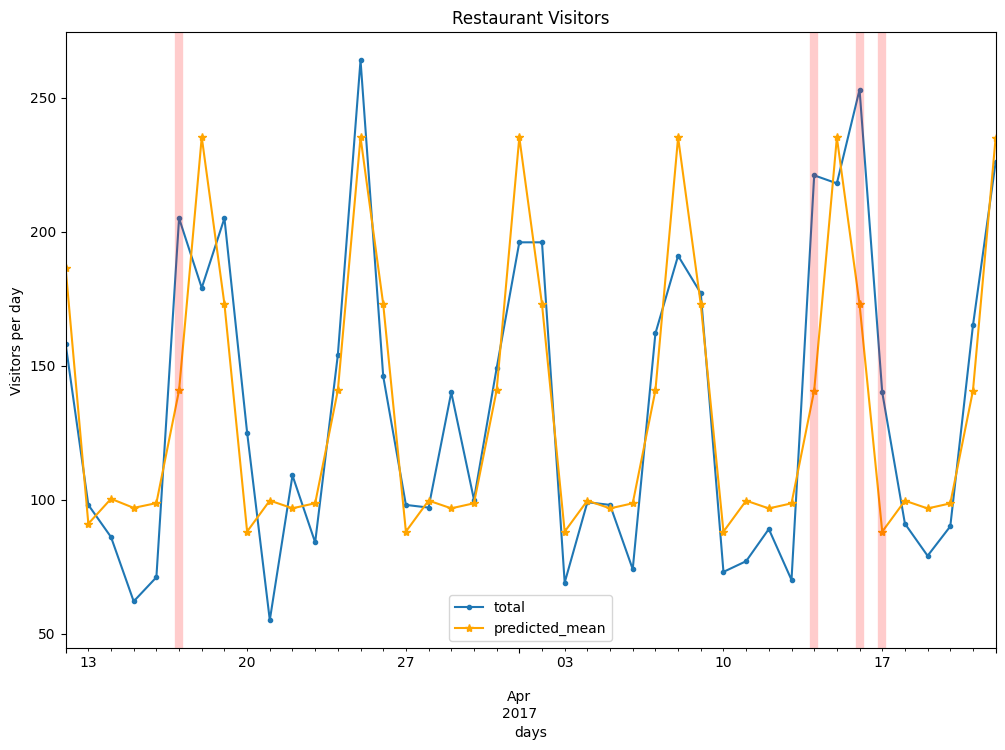

In [23]:
performance(test['total'], predictions)
# Plot predictions against known values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['total'].plot(legend=True,figsize=(12,8),title=title, style = ".-")
predictions.plot(legend=True,color = 'orange', style = '-*')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='red', alpha = 0.2, linewidth = 6)

### Let's use Exogenous  Variable: let's add holiday info into our Model

In [70]:
model = SARIMAX(train['total'],
                exog=train['holiday'],
                order=(1,0,0),
                seasonal_order=(1,0,1,7),
                )
# Train Model
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [71]:
test.head(14)

,total,Lag_1,last_month_avg_level,last_week_avg_level,last_2week_avg_level,sale_wrt_dow,holiday
436,158.0,296.0,141.161290,137.142857,128.142857,178.460317,0
437,98.0,158.0,142.322581,136.285714,128.500000,89.593750,0
438,86.0,98.0,140.774194,141.285714,129.928571,94.531250,0
439,62.0,86.0,136.483871,143.714286,127.285714,94.687500,0
440,71.0,62.0,132.548387,138.000000,127.357143,99.015625,0
441,205.0,71.0,132.774194,132.285714,126.714286,147.171875,1
442,179.0,205.0,131.387097,139.428571,134.071429,229.125000,0
443,205.0,179.0,134.258065,122.714286,129.928571,178.460317,0
444,125.0,205.0,137.322581,129.428571,132.857143,89.593750,0
445,55.0,125.0,136.838710,133.285714,137.285714,94.531250,0


-  Learn Trend, Seasonlity etc for External Vars and predict exogenous and then we can use them as feature

In [72]:
# add exog variable to prediction function
exog_forecast = test[['holiday']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start,
                              end=end,
                              exog=exog_forecast).rename('Predictions')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ValueError: Provided exogenous values are not of the appropriate shape. Required (73, 1), got (42, 1).

In [ ]:
start, end

In [57]:
477-436+1

42

1-42 Days in Future on our Test Set

MAE : 18.903
RMSE : 23.263
MAPE: 0.163


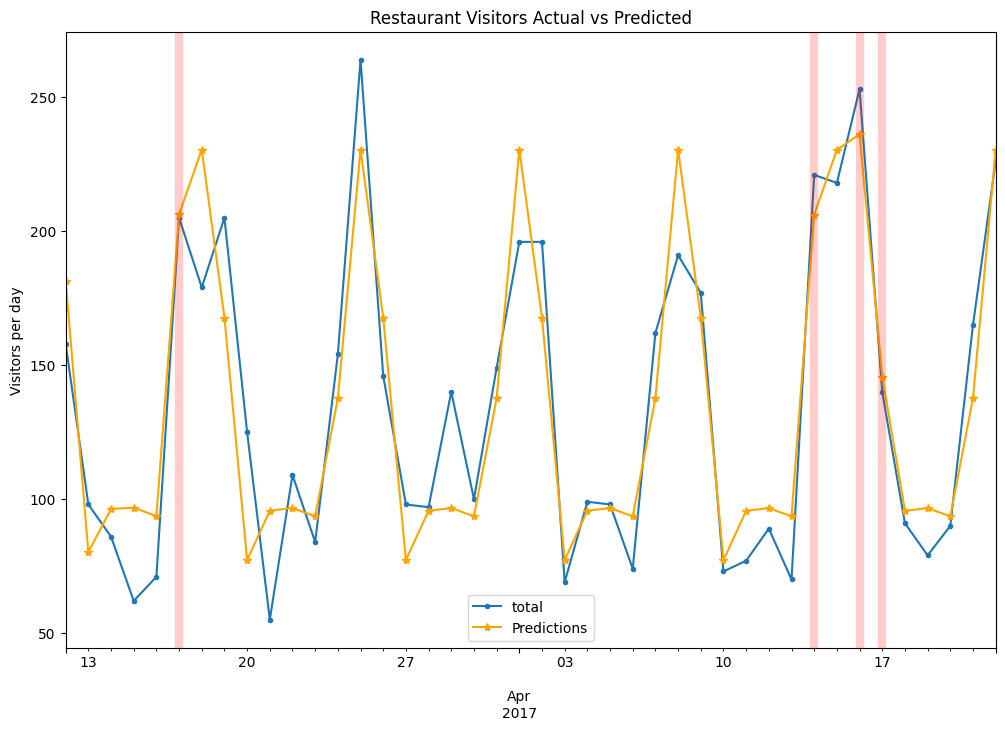

In [28]:
performance(test['total'], predictions)
# Plot predictions against known values
title='Restaurant Visitors Actual vs Predicted'
ylabel='Visitors per day'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,8),title=title, style = ".-")
predictions.plot(legend=True, color = 'orange', style = '-*')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='red', alpha = 0.2, linewidth = 6);

Prediciting the future: the 39 values we had dropped

In [ ]:
model = SARIMAX(df['total'],exog=df['holiday'],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
exog_forecast = df1[478:][['holiday']]
fcast = results.predict(478,
                        df1.shape[0]-1,
                        exog = exog_forecast
                        ).rename('Forecast')

In [53]:
478,df1.shape[0]-1

(478, 516)

In [55]:
516-478 +1

39

- unseen 39 Days

and plot

In [ ]:
# Plot the forecast alongside historical values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='days'

# ax = df['total'][-100:].plot(legend=True,figsize=(16,5),title=title, style = '-*')
plt.plot(df[-100:].index, df[-100:].total, '-*')
fcast.plot(legend=True, style = '-*')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in df[-100:].query('holiday==1').index:
    plt.axvline(x=x, color='red', alpha = 0.2, linewidth = 6)

for x in df1[-42:].query('holiday==1').date:
    plt.axvline(x=pd.to_datetime(x), color='red', alpha = 0.2, linewidth = 6)
plt.show()

## Linear Regression


### Can we Use Just Linear Regression on Time Series Data?

In [30]:
df = df1.copy()
df['date'] = pd.to_datetime(df['date'])

### Feature Engineering

In [31]:
import numpy as np

# extract weekend info from WeekDays
df["weekday"] = np.where((
    (df["weekday"] == "Friday") | (df["weekday"] == "Thursday") | (df["weekday"] == "Wednesday") | (df["weekday"] == "Tuesday") | (df["weekday"] == "Monday")),
                         "working_day", "weekend")
intmdt = pd.get_dummies(df['weekday'])
df = pd.concat([df, intmdt], axis =1 )
df.head()

,date,weekday,holiday,total,weekend,working_day
0,2016-01-01,working_day,1,296.0,False,True
1,2016-01-02,weekend,0,191.0,True,False
2,2016-01-03,weekend,0,202.0,True,False
3,2016-01-04,working_day,0,105.0,False,True
4,2016-01-05,working_day,0,98.0,False,True


In [32]:
df[['weekday','working_day' ]].value_counts()

weekday      working_day
working_day  True           369
weekend      False          148
Name: count, dtype: int64

#### Let's Create Lag Features

In [33]:
for i in range(1,32):
  df["Lag_{}".format(i)] = df['total'].shift(i)

In [34]:
df.head()

,date,weekday,holiday,total,weekend,working_day,Lag_1,Lag_2,Lag_3,Lag_4,...,Lag_22,Lag_23,Lag_24,Lag_25,Lag_26,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31
0,2016-01-01,working_day,1,296.0,False,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,weekend,0,191.0,True,False,296.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,weekend,0,202.0,True,False,191.0,296.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,working_day,0,105.0,False,True,202.0,191.0,296.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,working_day,0,98.0,False,True,105.0,202.0,191.0,296.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Last 31 Days as Feature

In [35]:
lis = ['Lag_{}'.format(i) for i in range(1,32)]
df.dropna(inplace = True)    # Drop because some Lags will be NaN.
df.head()

,date,weekday,holiday,total,weekend,working_day,Lag_1,Lag_2,Lag_3,Lag_4,...,Lag_22,Lag_23,Lag_24,Lag_25,Lag_26,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31
31,2016-02-01,working_day,0,94.0,False,True,204.0,225.0,150.0,95.0,...,212.0,234.0,149.0,69.0,83.0,98.0,105.0,202.0,191.0,296.0
32,2016-02-02,working_day,1,100.0,False,True,94.0,204.0,225.0,150.0,...,101.0,212.0,234.0,149.0,69.0,83.0,98.0,105.0,202.0,191.0
33,2016-02-03,working_day,0,72.0,False,True,100.0,94.0,204.0,225.0,...,57.0,101.0,212.0,234.0,149.0,69.0,83.0,98.0,105.0,202.0
34,2016-02-04,working_day,0,97.0,False,True,72.0,100.0,94.0,204.0,...,65.0,57.0,101.0,212.0,234.0,149.0,69.0,83.0,98.0,105.0
35,2016-02-05,working_day,0,147.0,False,True,97.0,72.0,100.0,94.0,...,106.0,65.0,57.0,101.0,212.0,234.0,149.0,69.0,83.0,98.0


### Let's calculate Average of All the lag_sales

In [36]:
df['last_month_avg_level'] = df.loc[:,lis].sum(axis=1)/31
df.head()

,date,weekday,holiday,total,weekend,working_day,Lag_1,Lag_2,Lag_3,Lag_4,...,Lag_23,Lag_24,Lag_25,Lag_26,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31,last_month_avg_level
31,2016-02-01,working_day,0,94.0,False,True,204.0,225.0,150.0,95.0,...,234.0,149.0,69.0,83.0,98.0,105.0,202.0,191.0,296.0,143.419355
32,2016-02-02,working_day,1,100.0,False,True,94.0,204.0,225.0,150.0,...,212.0,234.0,149.0,69.0,83.0,98.0,105.0,202.0,191.0,136.903226
33,2016-02-03,working_day,0,72.0,False,True,100.0,94.0,204.0,225.0,...,101.0,212.0,234.0,149.0,69.0,83.0,98.0,105.0,202.0,133.967742
34,2016-02-04,working_day,0,97.0,False,True,72.0,100.0,94.0,204.0,...,57.0,101.0,212.0,234.0,149.0,69.0,83.0,98.0,105.0,129.774194
35,2016-02-05,working_day,0,147.0,False,True,97.0,72.0,100.0,94.0,...,65.0,57.0,101.0,212.0,234.0,149.0,69.0,83.0,98.0,129.516129


- Weekly Average

In [37]:
lis = ['Lag_{}'.format(i) for i in range(1,8)]
df['last_week_avg_level'] = df.loc[:,lis].sum(axis=1)/7
df.head(3)

,date,weekday,holiday,total,weekend,working_day,Lag_1,Lag_2,Lag_3,Lag_4,...,Lag_24,Lag_25,Lag_26,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31,last_month_avg_level,last_week_avg_level
31,2016-02-01,working_day,0,94.0,False,True,204.0,225.0,150.0,95.0,...,149.0,69.0,83.0,98.0,105.0,202.0,191.0,296.0,143.419355,135.714286
32,2016-02-02,working_day,1,100.0,False,True,94.0,204.0,225.0,150.0,...,234.0,149.0,69.0,83.0,98.0,105.0,202.0,191.0,136.903226,135.571429
33,2016-02-03,working_day,0,72.0,False,True,100.0,94.0,204.0,225.0,...,212.0,234.0,149.0,69.0,83.0,98.0,105.0,202.0,133.967742,139.000000


- Bi-Weekly Average

In [38]:
lis = ["Lag_{}".format(i) for i in range(1,15)]
df['last_2week_avg_level'] = df.loc[:,lis].sum(axis = 1)/14
df.head(3)

,date,weekday,holiday,total,weekend,working_day,Lag_1,Lag_2,Lag_3,Lag_4,...,Lag_25,Lag_26,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31,last_month_avg_level,last_week_avg_level,last_2week_avg_level
31,2016-02-01,working_day,0,94.0,False,True,204.0,225.0,150.0,95.0,...,69.0,83.0,98.0,105.0,202.0,191.0,296.0,143.419355,135.714286,139.214286
32,2016-02-02,working_day,1,100.0,False,True,94.0,204.0,225.0,150.0,...,149.0,69.0,83.0,98.0,105.0,202.0,191.0,136.903226,135.571429,136.500000
33,2016-02-03,working_day,0,72.0,False,True,100.0,94.0,204.0,225.0,...,234.0,149.0,69.0,83.0,98.0,105.0,202.0,133.967742,139.000000,136.500000


- Weekly Seasonality

- HW: Extract Month, Year

In [39]:
df['dayofweek'] = df['date'].dt.dayofweek
df['dayofweek'].value_counts()

dayofweek
0    64
1    64
2    64
3    64
4    64
5    64
6    63
Name: count, dtype: int64

In [42]:
df['date'].dt.month

31     2
32     2
33     2
34     2
35     2
      ..
473    4
474    4
475    4
476    4
477    4
Name: date, Length: 447, dtype: int32

In [43]:
df['sale_wrt_dow'] = df.groupby('dayofweek')['total'].transform('mean')
df[['sale_wrt_dow', 'dayofweek']].drop_duplicates()

,sale_wrt_dow,dayofweek
31,89.593750,0
32,94.531250,1
33,94.687500,2
34,99.015625,3
35,147.171875,4
36,229.125000,5
37,178.460317,6


In [44]:
import copy             #dfo has the data with all the columns
dfo = df.copy()

In [45]:
df = dfo.copy()
df = df[['total', 'Lag_1', 'last_month_avg_level', 'last_week_avg_level',
          'last_2week_avg_level', 'sale_wrt_dow', 'holiday']]
df.head()

,total,Lag_1,last_month_avg_level,last_week_avg_level,last_2week_avg_level,sale_wrt_dow,holiday
31,94.0,204.0,143.419355,135.714286,139.214286,89.593750,0
32,100.0,94.0,136.903226,135.571429,136.500000,94.531250,1
33,72.0,100.0,133.967742,139.000000,136.500000,94.687500,0
34,97.0,72.0,129.774194,134.285714,134.000000,99.015625,0
35,147.0,97.0,129.516129,134.571429,133.357143,147.171875,0


### Train Test Split

In [47]:
df.shape[0]

447

In [49]:
train = df.iloc[:df.shape[0]-42].dropna()
test = df.iloc[df.shape[0]-42:]


train_X = train.drop(["total"],axis =1)
train_y = train['total']
test_X = test.drop(["total"],axis =1)
test_y = test['total']

### Let's Create and Fit Model

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape

# Train and pred
model = LinearRegression()
model.fit(train_X, train_y)
y_pred = pd.Series(model.predict(test_X), index=test.index)
mape(test['total'], y_pred)

0.1550950649148067

How we can predict sales after more than 1 day using Linear Regression

Note: This is Predicting Just 1 Day in Future unlike SARIMAX where we could predict N Days Future

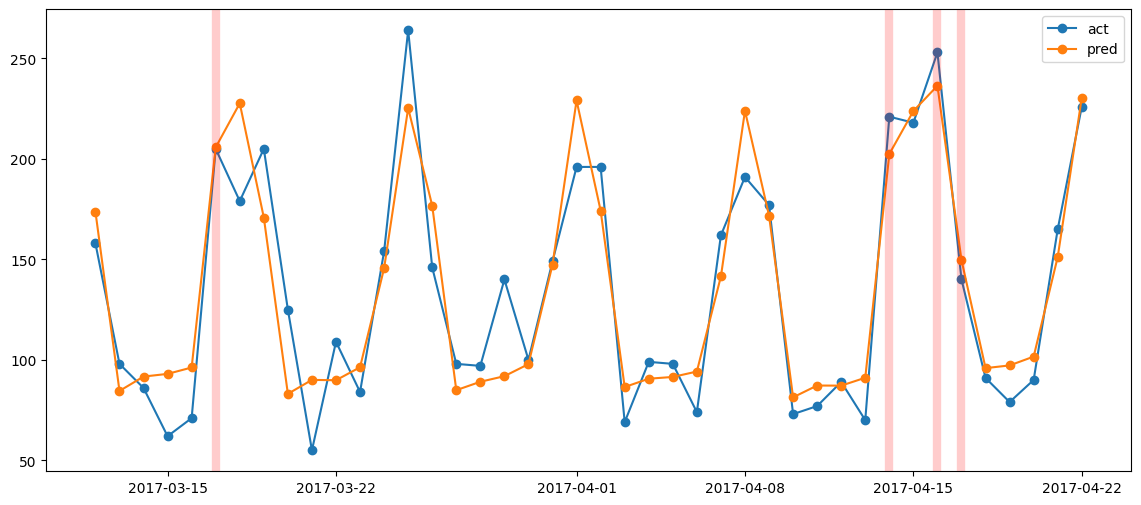

In [51]:
plt.plot(dfo.tail(42)['date'], test_y, '-o', label='act')
plt.plot(dfo.tail(42)['date'], y_pred, '-o', label='pred')
for x in dfo[-42:].query('holiday==1')['date']:
    plt.axvline(x=x, color='red',alpha = 0.2, linewidth = 6)
plt.legend()

### Facebook Prophet

Installation

In [58]:
from prophet import Prophet

In [ ]:
#!pip install pystan~=2.14
#!pip install fbprophet

In [ ]:
from prophet import Prophet

pre-processing required for Prophet:
- date should be named as ds
- target_col should be names as y

In [60]:
df = df1.copy()

df['ds'] = pd.to_datetime(df['date'])
df['y'] = df['total']
df = df[['ds', 'y', 'holiday']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       517 non-null    datetime64[ns]
 1   y        478 non-null    float64       
 2   holiday  517 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 12.2 KB


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqcu_yrj/v6v489z8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqcu_yrj/inzfopek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16365', 'data', 'file=/tmp/tmpbqcu_yrj/v6v489z8.json', 'init=/tmp/tmpbqcu_yrj/inzfopek.json', 'output', 'file=/tmp/tmpbqcu_yrj/prophet_modelzeu3fi7v/prophet_model-20240427170910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:09:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:09:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


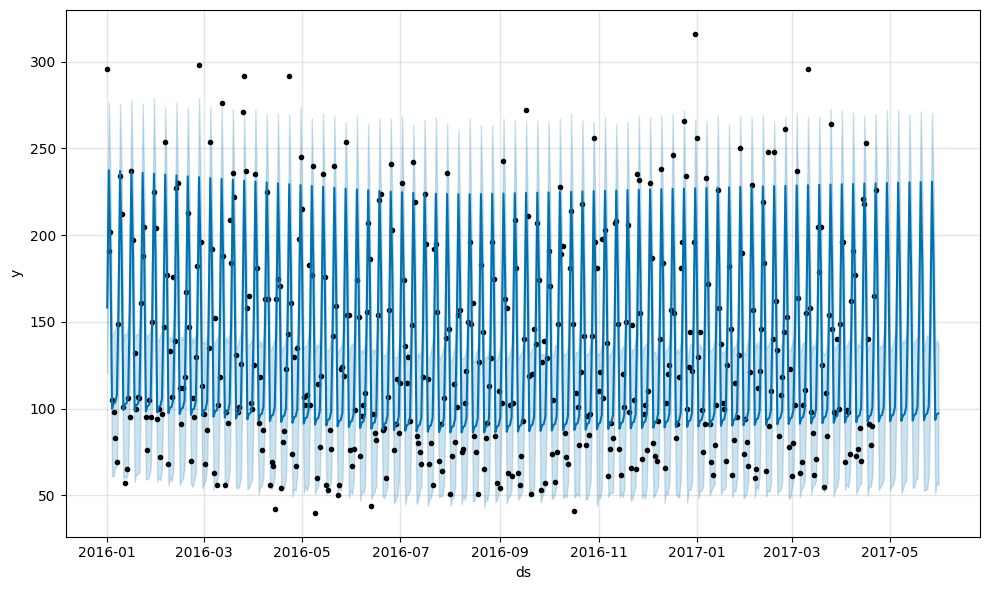

In [61]:
# create model
m = Prophet()


# fit Model
m.fit(df[['ds', 'y']][:-39]) #here we are leaving last 39 observations because we will predict it in 'future'

# predict Future
# future Dataframe
future = m.make_future_dataframe(periods=39,freq="D")

# prediction
forecast = m.predict(future)
fig = m.plot(forecast)

In [62]:
forecast.tail(4)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
513,2017-05-28,136.358999,141.147492,225.565871,136.195524,136.522074,46.765696,46.765696,46.765696,46.765696,46.765696,46.765696,0.0,0.0,0.0,183.124695
514,2017-05-29,136.384708,51.207072,134.280149,136.214474,136.559878,-42.866641,-42.866641,-42.866641,-42.866641,-42.866641,-42.866641,0.0,0.0,0.0,93.518067
515,2017-05-30,136.410417,57.722414,139.348699,136.232446,136.591065,-39.702954,-39.702954,-39.702954,-39.702954,-39.702954,-39.702954,0.0,0.0,0.0,96.707463
516,2017-05-31,136.436126,56.036759,137.106418,136.251368,136.624821,-39.112778,-39.112778,-39.112778,-39.112778,-39.112778,-39.112778,0.0,0.0,0.0,97.323347


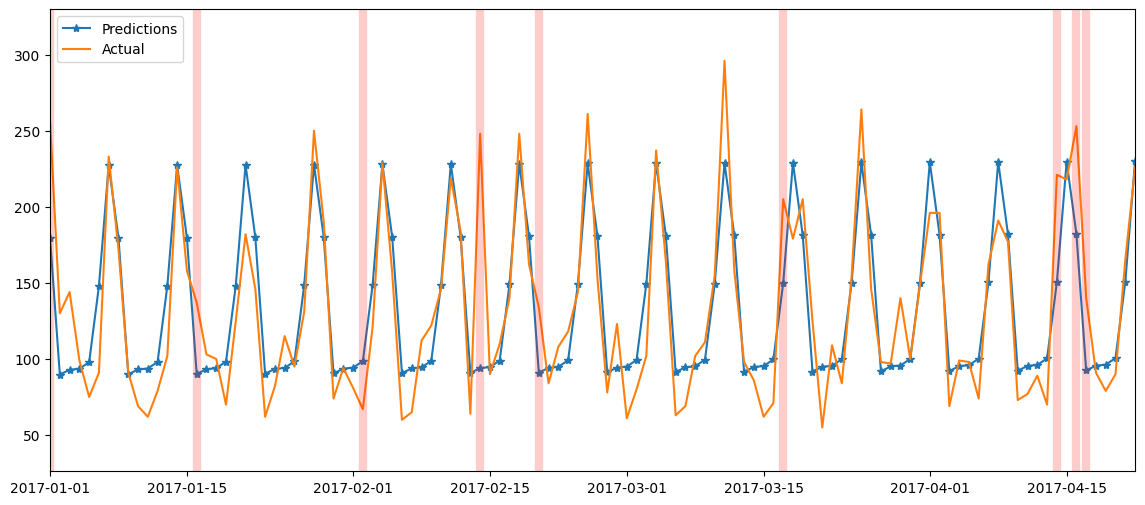

In [63]:
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')
for x in df.query('holiday==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.2, linewidth = 6);
plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2017-04-22'))
plt.legend()

In [64]:
performance(df['y'][:-39],forecast['yhat'][:-39])


MAE : 24.057
RMSE : 31.984
MAPE: 0.213


### Exogeneous and Change Point scale Parameters

- higher Value of Change Point scale Parameters will make your model more flexting for Trend Changes

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqcu_yrj/bjdce9da.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqcu_yrj/rgrf9of3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28250', 'data', 'file=/tmp/tmpbqcu_yrj/bjdce9da.json', 'init=/tmp/tmpbqcu_yrj/rgrf9of3.json', 'output', 'file=/tmp/tmpbqcu_yrj/prophet_modelvzff0r5u/prophet_model-20240427171359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:13:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:14:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


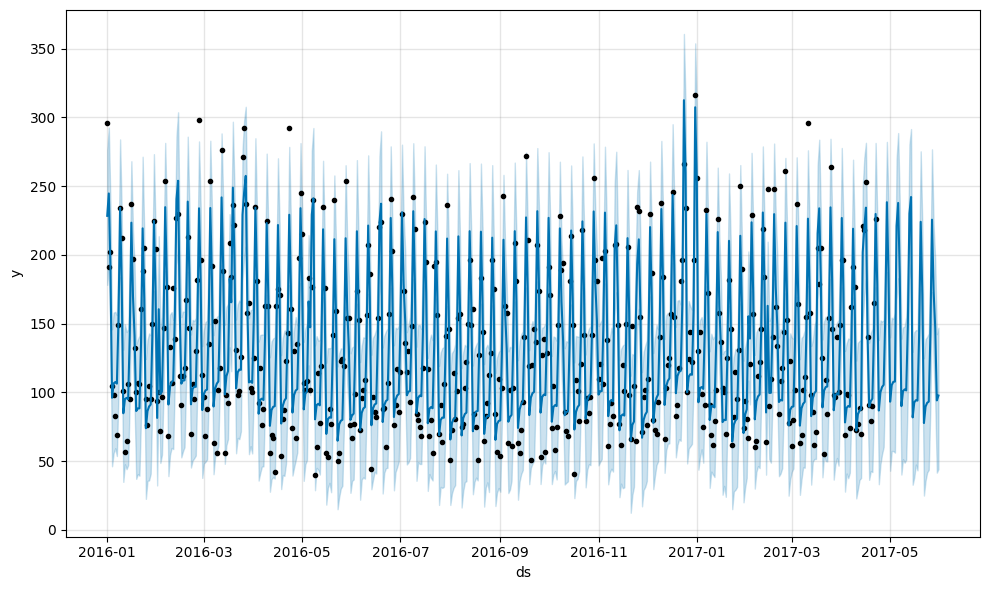

In [65]:
model2=Prophet(interval_width=0.95,
               yearly_seasonality=True,
               weekly_seasonality=True,
               changepoint_prior_scale=4) # default = 0.05

# Add Exogeneous Variable
model2.add_regressor('holiday') #adding holidays data in the model3

# train Model
model2.fit(df[:-39])

# predict
forecast2 = model2.predict(df)

# plot
fig = model2.plot(forecast2)

In [66]:
performance(df['y'][:-39],forecast2['yhat'][:-39])

MAE : 19.923
RMSE : 25.671
MAPE: 0.18


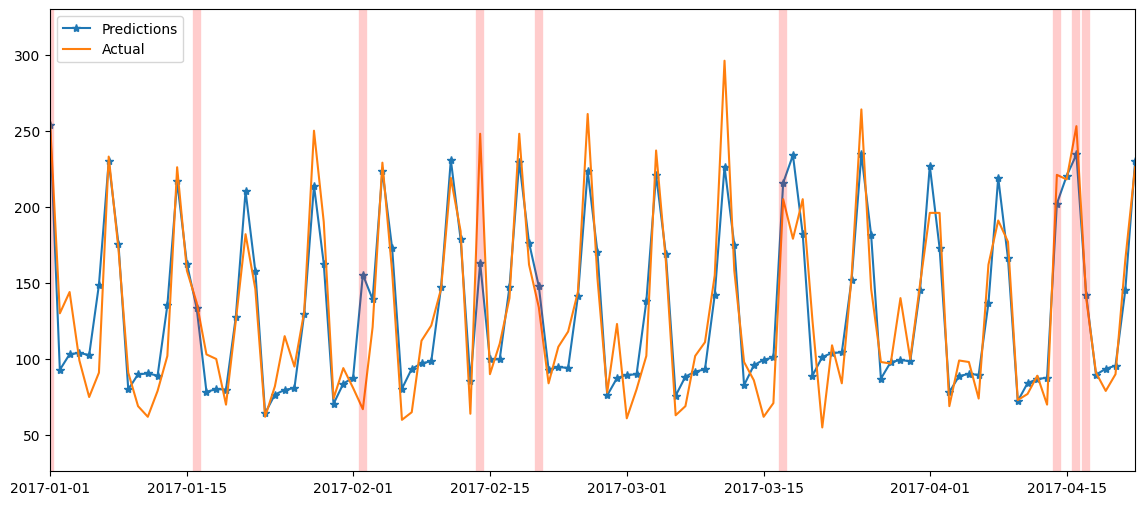

In [68]:
plt.plot(forecast2['ds'], forecast2['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')
plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2017-04-22'))
for x in df.query('holiday==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.2, linewidth = 6);
plt.legend()

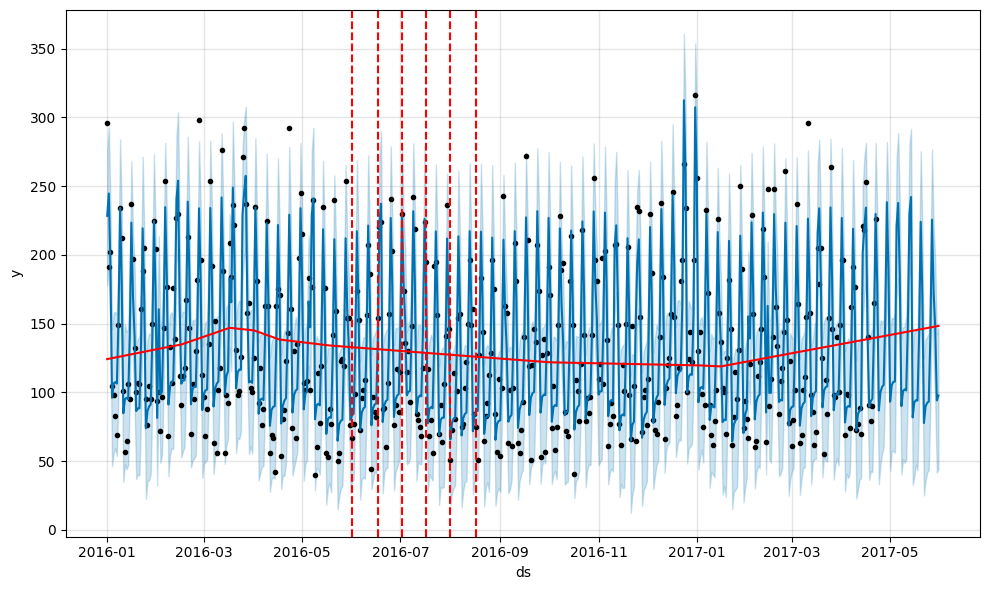

In [69]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast2)
a = add_changepoints_to_plot(fig.gca(), m, forecast2)


- PMDARIMA